Using device: cuda
Original data: b'Hello, Exponential Canopy Fractal! This is a test of error correction using GPU acceleration with exponential growth pattern. This structure mimics the rapid expansion seen in many natural and technological systems, potentially allowing for vast data storage and complex hierarchical relationships.'
Decoded data: b'Hello, Exponential Canopy Fractal! This is a test of error correction using GPU acceleration with exponential growth pattern. This structure mimics the rapid expansion seen in many natural and technological systems, potentially allowing for vast data storage and complex hierarchical relationships.'
Storage Capacity: 250 bytes (2000 bits)
Execution time: 1.10 seconds


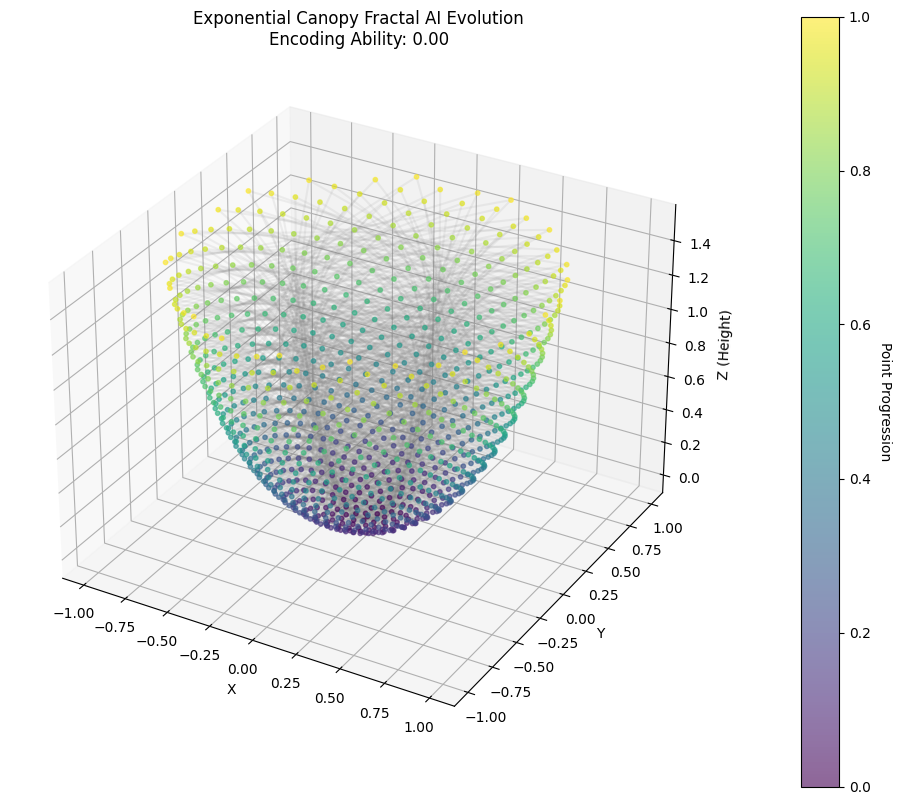

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SyntheticAI:
    def __init__(self):
        self.encoding_ability = torch.tensor([0.0], device=device)
        self.decoding_ability = torch.tensor([0.0], device=device)

    def train(self):
        self.encoding_ability += torch.rand(1, device=device) * 0.01
        self.decoding_ability += torch.rand(1, device=device) * 0.01

    def encode(self, data):
        return (data + self.encoding_ability) % 256

    def decode(self, encoded_data):
        return (encoded_data - self.decoding_ability) % 256

def generate_exponential_canopy(iterations, base):
    points = [(0, 0, 0)]
    for i in range(1, iterations):
        height = base ** (i / iterations) - 1
        angle = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        radius = np.sqrt(i) / np.sqrt(iterations)
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        points.append((x, y, height))
    return points

def plot_exponential_canopy(points, ai):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=10, alpha=0.6)

    # Plot connecting lines
    for i in range(1, len(points)):
        ax.plot([points[i-1][0], points[i][0]],
                [points[i-1][1], points[i][1]],
                [points[i-1][2], points[i][2]],
                color='gray', alpha=0.1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    plt.title(f"Exponential Canopy Fractal AI Evolution\nEncoding Ability: {ai.encoding_ability.item():.2f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data_with_error_correction(data, points, ai):
    data_tensor = torch.tensor([int(b) for b in data], dtype=torch.float32, device=device)
    encoded_data = []
    chunk_size = 3  # Store each byte 3 times for redundancy
    for i in range(0, len(data_tensor), chunk_size):
        chunk = data_tensor[i:i+chunk_size]
        for byte in chunk:
            if len(encoded_data) < len(points):
                encoded_value = ai.encode(byte)
                encoded_data.extend([(points[len(encoded_data)], encoded_value)] * 3)  # Store 3 times
    return encoded_data

def decode_data_with_error_correction(encoded_data, ai):
    decoded_data = []
    chunk_size = 3
    for i in range(0, len(encoded_data), chunk_size * 3):
        chunk = encoded_data[i:i+chunk_size*3]

        # Decode each byte (taking average of 3 repetitions)
        for j in range(0, len(chunk), 3):
            byte_values = [ai.decode(chunk[j+k][1]).item() for k in range(3) if j+k < len(chunk)]
            decoded_byte = int(sum(byte_values) / len(byte_values))
            decoded_data.append(decoded_byte)

    return bytes(decoded_data)

def calculate_storage_capacity(points):
    total_points = len(points)
    usable_points = total_points * 3 // 4  # 1/4 of points used for error correction
    byte_capacity = usable_points // 3  # Each byte stored 3 times
    bit_capacity = byte_capacity * 8

    return byte_capacity, bit_capacity

def main():
    iterations = 1000  # Increased for more storage capacity
    base = 2.5  # Exponential base, can be adjusted

    start_time = time.time()

    ai = SyntheticAI()
    points = generate_exponential_canopy(iterations, base)

    fig = plot_exponential_canopy(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    sample_data = b"Hello, Exponential Canopy Fractal! This is a test of error correction using GPU acceleration with exponential growth pattern. This structure mimics the rapid expansion seen in many natural and technological systems, potentially allowing for vast data storage and complex hierarchical relationships."
    encoded_data = encode_data_with_error_correction(sample_data, points, ai)
    decoded_data = decode_data_with_error_correction(encoded_data, ai)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data: {sample_data}")
    print(f"Decoded data: {decoded_data}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")

    plt.show()

if __name__ == "__main__":
    main()

# 1 To run this code, execute this cell in a GPU-enabled Colab notebook